In [1]:
import numpy as np  # To load numpy
import pandas as pd # To load pandas
import math # To calcuate mathematical problems
import time #To calculate the time that take implement the algorithm
from sklearn.model_selection import train_test_split  # for split arrays or matrices into random train and test subsets
from sklearn.neighbors import KNeighborsClassifier    # here we are importing KNeighborsClassifie from sklearn
from sklearn.neighbors import KNeighborsRegressor  # here we are importing KNeighborsregressor from sklearn
from sklearn.neighbors import NearestNeighbors # here we are importing nearestneighbor from sklearn
from sklearn import metrics   # importing metrics from sklearn to findout the performance measures.
import sklearn.preprocessing as preprocessing #Importing preprocess algorithm
import numpy.linalg as la
import matplotlib.pyplot as plt #For plotting the graph

In [2]:
#Download the dataset from "https://www.kaggle.com/bistaumanga/usps-dataset"
#Load USPS Dataset from HDF5 file
import h5py
usps="usps.h5"
with h5py.File(usps, 'r') as hf: #the dataset fetch in reading format
        train = hf.get('train')
        x_train = train.get('data')[:]
        y_train = train.get('target')[:]
        test = hf.get('test')
        x_test = test.get('data')[:]
        y_test = test.get('target')[:]

In [3]:
x_train

array([[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.1645, 0.086 , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]],
      dtype=float32)

In [4]:
y_train

array([6, 5, 4, ..., 3, 0, 1])

In [5]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
y_test

array([9, 6, 3, ..., 4, 0, 1])

In [7]:
x_train_proper, x_calibration, y_train_proper, y_calibration = train_test_split(x_train, y_train, random_state=0)
print('x_train_proper: ' + str(x_train_proper.shape))
print('y_train_proper: ' + str(y_train_proper.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))
print('x_calibration: ' + str(x_calibration.shape))
print('y_calibration: ' + str(y_calibration.shape))
print("Training set Size:", len(x_train_proper))
print("Test Set Size:",len(x_test))
print("Calibration Set Size:",len(x_calibration))

x_train_proper: (5468, 256)
y_train_proper: (5468,)
x_test:  (2007, 256)
y_test:  (2007,)
x_calibration: (1823, 256)
y_calibration: (1823,)
Training set Size: 5468
Test Set Size: 2007
Calibration Set Size: 1823


In [8]:
print(" Result of  Nearest Neighbour Algorithm for classsification is \n")
start = time.time()
nn_class = KNeighborsClassifier(n_neighbors=1)
nn_class.fit(x_train_proper,y_train_proper)
y_pred = nn_class.predict(x_test)
print('\nPrediction time  is: ',"%.2f" %(time.time() - start),"seconds")
print('Accuracy:',nn_class.score(x_test,y_test))
print("Error Rate is: ",1-nn_class.score(x_test,y_test))

 Result of  Nearest Neighbour Algorithm for classsification is 


Prediction time  is:  5.01 seconds
Accuracy: 0.9431988041853513
Error Rate is:  0.05680119581464871


In [9]:
print(" Result of  Nearest Neighbour Algorithm for Regression is \n")
start = time.time()
nn_reg = KNeighborsRegressor(n_neighbors=1)
nn_reg.fit(x_train_proper,y_train_proper)
y_pred = nn_class.predict(x_test)
print('\nPrediction time  is: ',"%.2f" %(time.time() - start),"seconds")
print('Accuracy:',nn_reg.score(x_test,y_test))
print("Error Rate is: ",1-nn_reg.score(x_test,y_test))

 Result of  Nearest Neighbour Algorithm for Regression is 


Prediction time  is:  4.62 seconds
Accuracy: 0.8980694861335402
Error Rate is:  0.1019305138664598


In [10]:
print(" Result of  Nearest Neighbour Algorithm for Unsupervised learning is \n")
start = time.time()
nn_model = NearestNeighbors(n_neighbors=1)
nn_model.fit(x_train_proper,y_train_proper)
print('\nPrediction time  is: ',"%.2f" %(time.time() - start),"seconds")

 Result of  Nearest Neighbour Algorithm for Unsupervised learning is 


Prediction time  is:  0.35 seconds


In [11]:
#Initialize the variables
def set_variables(x_train_proper,y_train_proper,x_test,k):
    nn_model = NearestNeighbors(n_neighbors=k+1)
    ncp_score=np.zeros(len(x_train_proper)+1)
    p_values=np.zeros((len(x_test),len(set(y_train_proper))))
    pred=np.zeros(len(x_test))
    conf=np.zeros(len(x_test))
    cred=np.zeros(len(x_test))
    sum_p_values=0
    return  nn_model,ncp_score, p_values, pred, conf, cred, sum_p_values

In [12]:
def nn_icp(x_train_proper,y_train_proper,x_calibration,y_calibration,x_test,y_test,k):
    #Initialize variables for storage
    nn_model, score, p_values, pred, conf, cred, sum_p_values = \
    set_variables(x_train_proper,y_train_proper,x_test,k)
    ncp_score=[]
    #Calculate the non-conformity scores for the calibration set ,here calculating distance to the nearest sample of the
    #same and different labels with each sambles in that label
    for n in set(y_train_proper):
        same_dist_train=x_train_proper[y_train_proper==n] #obtain samples in the proper training set with label n
        same_dist_cal=x_calibration[y_calibration==n]#obtain samples in calibration set with label n
        nn_model.fit(same_dist_train)#Fit nearest neighbours to the training set proper 
        ncs_same=nn_model.kneighbors(same_dist_cal)[0][:,1]#Get distances for calibration set samples with the same label     
        diff_dist_train=x_train_proper[y_train_proper!=n]#Get samples in the training set proper with a different label
        nn_model.fit(diff_dist_train)#Fit nearest neighbours to the training set proper samples with the same label
        ncs_diff=nn_model.kneighbors(same_dist_cal)[0][:,0]
        ncp_score.extend(ncs_same/ncs_diff) #Calculate non-conformity score
    for i in range(len(x_test)):  #Loop through test samples
        for j in set(y_train_proper): #Test all possible labels
            nn_model.fit(x_train_proper[y_train_proper==j]) # Fit nearest neighbours to the training set proper sample
            same_dist_test=nn_model.kneighbors([x_test[i]])[0][0][1] #calculate the distance with same sambles in test set
            nn_model.fit(x_train_proper[y_train_proper!=j])#Fit nearest neighbours to the training set proper sample
            diff_dist_test=np.sum(nn_model.kneighbors([x_test[i]])[0][0][0]) #calculate the distance with different sambles in test set
            if diff_dist_test != 0: #We are using exception when distance between different sample is 0 due to issue in ranking
                ncp_score_test=np.append(ncp_score,same_dist_test/diff_dist_test)#Calculate non-conformity score in test set
                p_values[i][j]=np.mean(ncp_score_test>=ncp_score_test[-1])#Calculate regular p-values of test sample
        pred[i]=int(np.argmax(p_values[i]))#Use p-values of test sample to calculate predictions
        conf[i]=1- p_values[i][np.argsort(p_values[i])[-2]]#Use p-values of test sample to calculating confidence
        cred[i]=np.max(p_values[i])#Use p-values of test sample to calculating credibility
        sum_p_values = sum_p_values + np.sum(p_values[i]) - p_values[i][y_test[i]]#Calculating the total sumof p-value
    false_p_value=sum_p_values/(2*len(x_test))#Use p-values of test sample to calculate false p-value
    return pred, conf, cred, p_values, false_p_value

In [13]:
start_time = time.time()
nn_icp_p_value=nn_icp(x_train_proper,y_train_proper,x_calibration,y_calibration,x_test,y_test,1 )
print("--- %s seconds ---" % (time.time() - start_time))
print("Inductive SVM Accuracy: ", np.mean(nn_icp_p_value[0]==y_test))
print("Inductive SVM Avg False p-value: ", nn_icp_p_value[4])
print("Inductive Avg Credibility: ",np.mean(nn_icp_p_value[2]))
print("Inductive Avg Confidence: ",np.mean(nn_icp_p_value[1]))

--- 6123.504449605942 seconds ---
Inductive SVM Accuracy:  0.9446935724962631
Inductive SVM Avg False p-value:  0.012879537845610568
Inductive Avg Credibility:  0.47799341558929714
Inductive Avg Confidence:  0.9942711474750653


Text(0.5, 1.0, 'ICP NN Regular p-value- Validation Curve')

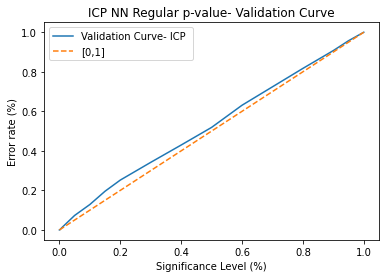

In [20]:
error_rate=[]
sig_level=[0,0.00001,0.0001,0.001,0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]
#Loop through the different significance level and use p-values to calculate their error rate
for point in sig_level :
    pred_set=[0] * len(x_test)
    error=0
    for i in range(len(x_test)):
        pred_set[i]=list(np.where(nn_icp_p_value[3][i]>(point))[0])
        if y_test[i] not in pred_set[i]:
            error+=1
    error_rate=np.append(error_rate,error/len(x_test))

plt.plot(sig_level,error_rate)
plt.plot([0,1],[0,1],"--")
plt.legend(["Validation Curve- ICP ","[0,1]"])
plt.xlabel("Significance Level (%)")
plt.ylabel("Error rate (%)")
plt.title("ICP NN Regular p-value- Validation Curve")

Implementing inductive conformal prediction for smoothed p-value

In [16]:
def nn_icp_smooth(x_train_proper,y_train_proper,x_calibration,y_calibration,x_test,y_test,k):
    #Initialize variables for storage
    nn_model, score, p_values, pred, conf, cred, sum_p_values = \
    set_variables(x_train_proper,y_train_proper,x_test,k)
    ncp_score=[]
    #Calculate the non-conformity scores for the calibration set ,here calculating distance to the nearest sample of the
    #same and different labels with each sambles in that label
    for n in set(y_train_proper):
        same_dist_train=x_train_proper[y_train_proper==n]#Get samples in the training set proper with label n
        same_dist_cal=x_calibration[y_calibration==n] #Get samples in calibration set with label n
        nn_model.fit(same_dist_train)#Fit nearest neighbours to the training set proper samples with the same label
        ncs_same=nn_model.kneighbors(same_dist_cal)[0][:,1]#Get distances for calibration set samples to samples of the same label
        diff_dist_train=x_train_proper[y_train_proper!=n]#Get samples in the training set proper with a different label to n 
        nn_model.fit(diff_dist_train)#Fit nearest neighbours to the training set proper samples with the same label
        ncs_diff=nn_model.kneighbors(same_dist_cal)[0][:,0]
        ncp_score.extend(ncs_same/ncs_diff)
    #Loop through test samples
    for i in range(len(x_test)):
        for j in set(y_train_proper): #Test all possible labels
            nn_model.fit(x_train_proper[y_train_proper==j])
            same_dist_test=nn_model.kneighbors([x_test[i]])[0][0][1]
            nn_model.fit(x_train_proper[y_train_proper!=j])
            diff_dist_test=np.sum(nn_model.kneighbors([x_test[i]])[0][0][0])
            if diff_dist_test != 0:
                ncp_score_test=np.append(ncp_score,same_dist_test/diff_dist_test)
        #Calculate smoothed p-values of test sample
                tau=np.random.uniform()
                p_values[i][j]=(np.sum(ncp_score_test>ncp_score_test[-1])+(tau*(np.sum(ncp_score_test==ncp_score_test[-1]))))/len(ncp_score_test)
        pred[i]=int(np.argmax(p_values[i]))#Use p-values of test sample to calculate various measures
        conf[i]=1- p_values[i][np.argsort(p_values[i])[-2]]
        cred[i]=np.max(p_values[i])
        sum_p_values = sum_p_values + np.sum(p_values[i]) - p_values[i][y_test[i]]
    false_p_value=sum_p_values/(2*len(x_test))
    return pred, conf, cred, p_values, false_p_value


In [17]:
start_time = time.time()
smooth_pred=nn_icp_smooth(x_train_proper,y_train_proper,x_calibration,y_calibration,x_test,y_test,1)
print("--- %s seconds ---" % (time.time() - start_time))
print("Inductive SVM Accuracy: ", np.mean(smooth_pred[0]==y_test))
print("Inductive SVM Avg False p-value: ", smooth_pred[4])
print("Inductive Avg Credibility: ",np.mean(smooth_pred[2]))
print("Inductive Avg Confidence: ",np.mean(smooth_pred[1]))

--- 5514.935352802277 seconds ---
Inductive SVM Accuracy:  0.9451918285999004
Inductive SVM Avg False p-value:  0.011650037959042773
Inductive Avg Credibility:  0.4777180694684141
Inductive Avg Confidence:  0.9944349208348685


Text(0.5, 1.0, 'ICP NN Validation Curve of smoothed p-value')

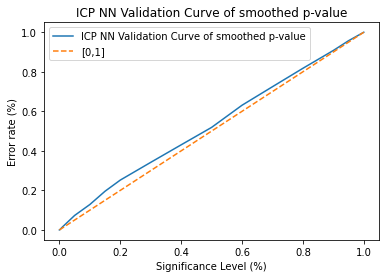

In [19]:
error_rate=[]
sig_level=[0,0.00001,0.0001,0.001,0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]
#Loop through the different significance level and use p-values to calculate their error rate
for point in sig_level :
    pred_set=[0] * len(x_test)
    error=0
    for i in range(len(x_test)):
        pred_set[i]=list(np.where(smooth_pred[3][i]>(point))[0])
        if y_test[i] not in pred_set[i]:
            error+=1
    error_rate=np.append(error_rate,error/len(x_test))

plt.plot(sig_level,error_rate)
plt.plot([0,1],[0,1],"--")
plt.legend(["ICP NN Validation Curve of smoothed p-value","[0,1]"])
plt.xlabel("Significance Level (%)")
plt.ylabel("Error rate (%)")
plt.title("ICP NN Validation Curve of smoothed p-value")